In [4]:
import pandas as pd

data = pd.read_csv('C:/Users/nelson/Downloads/K-Cluster mall file - Shopping Mall Customer Segmentation Data .csv')

data.head()
data
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [5]:
data.columns = data.columns.str.strip()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


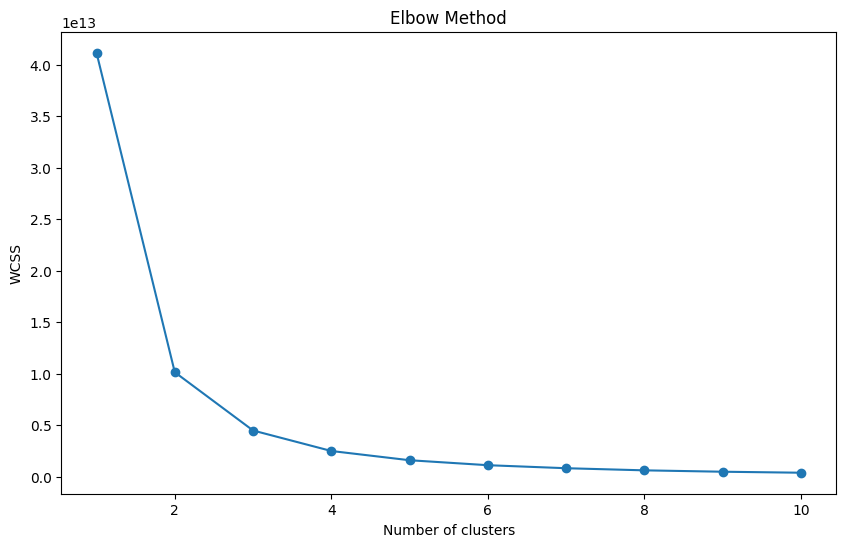

,Customer ID,Age,Gender,Annual Income,Spending Score,Cluster
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,4
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,2
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,3
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,3
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,4


In [7]:
# Extract features for clustering
features = data[['Annual Income', 'Spending Score']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Display the first few rows with cluster assignments
data.head()


In [21]:
cluster_summary = data.groupby('Cluster').agg({
    'Annual Income': ['mean', 'std'],
    'Spending Score': ['mean', 'std'],
    'Customer ID': 'count'
}).reset_index()

# Flatten multi-level column names
cluster_summary.columns = ['Cluster', 'Mean Annual Income', 'Std Annual Income', 'Mean Spending Score', 'Std Spending Score', 'Customer Count']

# Print the summary
print(cluster_summary)

   Cluster  Mean Annual Income  Std Annual Income  Mean Spending Score  \
0        0        64641.448285       25978.334786            75.496942   
1        1       156566.300856       25567.401948            25.539332   
2        2       154867.109801       25908.916800            75.066038   
3        3        65347.721062       26327.240587            25.765919   

   Std Spending Score  Customer Count  
0           14.589600            3761  
1           14.458304            3623  
2           14.456672            3816  
3           14.407460            3879  


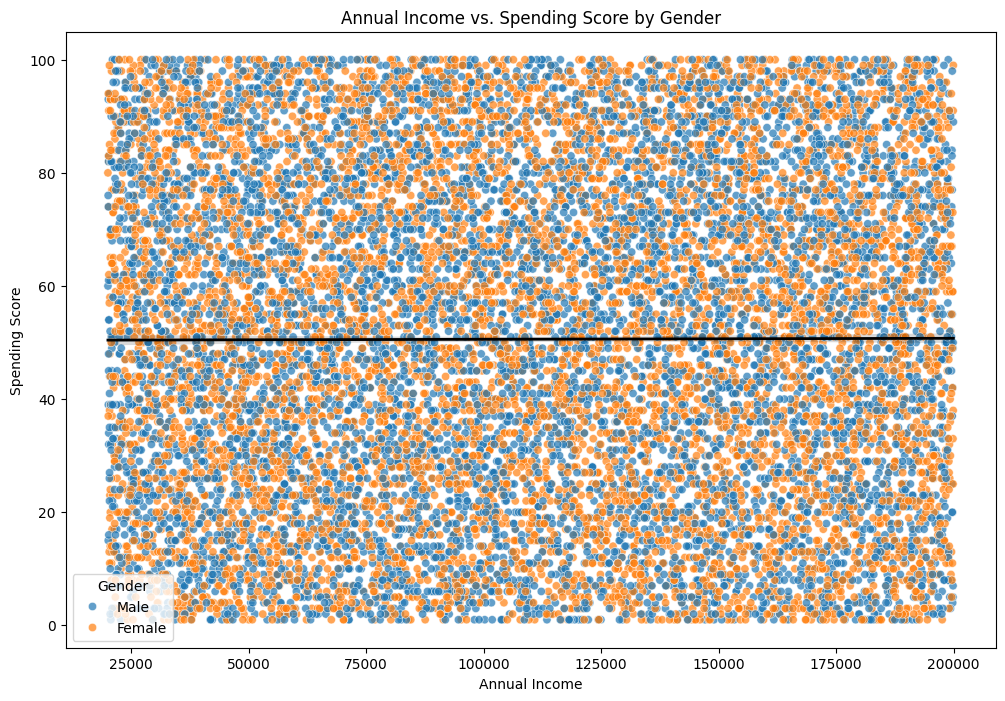

Correlation between Annual Income and Spending Score for Male: 0.01
Correlation between Annual Income and Spending Score for Female: 0.00


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/nelson/Downloads/K-Cluster mall file - Shopping Mall Customer Segmentation Data .csv')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Annual Income', y='Spending Score', hue='Gender', alpha=0.7)
sns.regplot(data=data, x='Annual Income', y='Spending Score', scatter=False, color='black', line_kws={'linewidth':2})
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Gender')
plt.show()

correlations = {}
for gender in data['Gender'].unique():
    subset = data[data['Gender'] == gender]
    correlation = subset[['Annual Income', 'Spending Score']].corr().iloc[0, 1]
    correlations[gender] = correlation

for gender, correlation in correlations.items():
    print(f'Correlation between Annual Income and Spending Score for {gender}: {correlation:.2f}')


In [9]:

avg_income = data['Annual Income'].mean()
avg_spending = data['Spending Score'].mean()

print(f"Average Annual Income: ${avg_income}k")
print(f"Average Spending Score: {avg_spending}")


Average Annual Income: $109742.88056237152k
Average Spending Score: 50.59161748126534


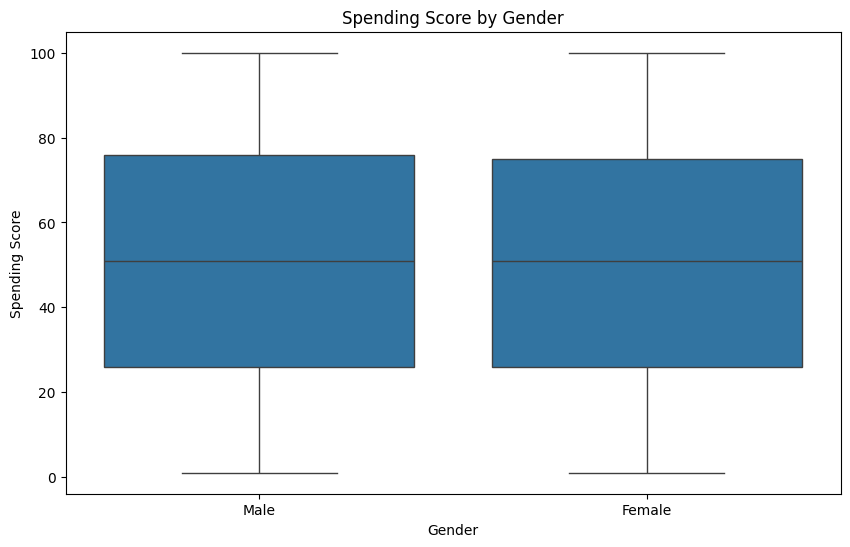

In [6]:
import seaborn as sns
import pandas as pd
data = pd.read_csv('C:/Users/nelson/Downloads/K-Cluster mall file - Shopping Mall Customer Segmentation Data .csv')



plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Spending Score')
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

In [12]:
import pandas as pd

data = pd.read_csv('C:/Users/nelson/Downloads/K-Cluster mall file - Shopping Mall Customer Segmentation Data .csv')


Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')


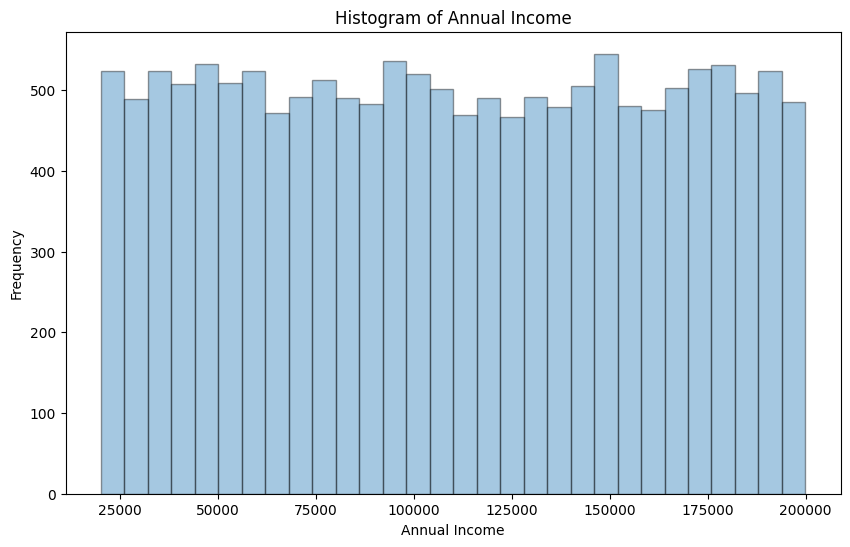

In [13]:
import matplotlib.pyplot as plt

print(data.columns)

plt.figure(figsize=(10, 6))
plt.hist(data['Annual Income'], bins=30, edgecolor='k', alpha=0.4)
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


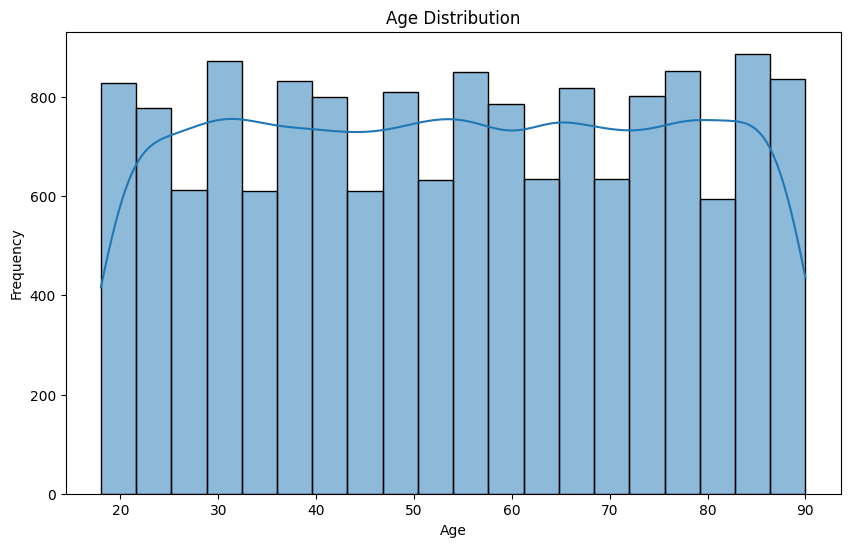

In [14]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


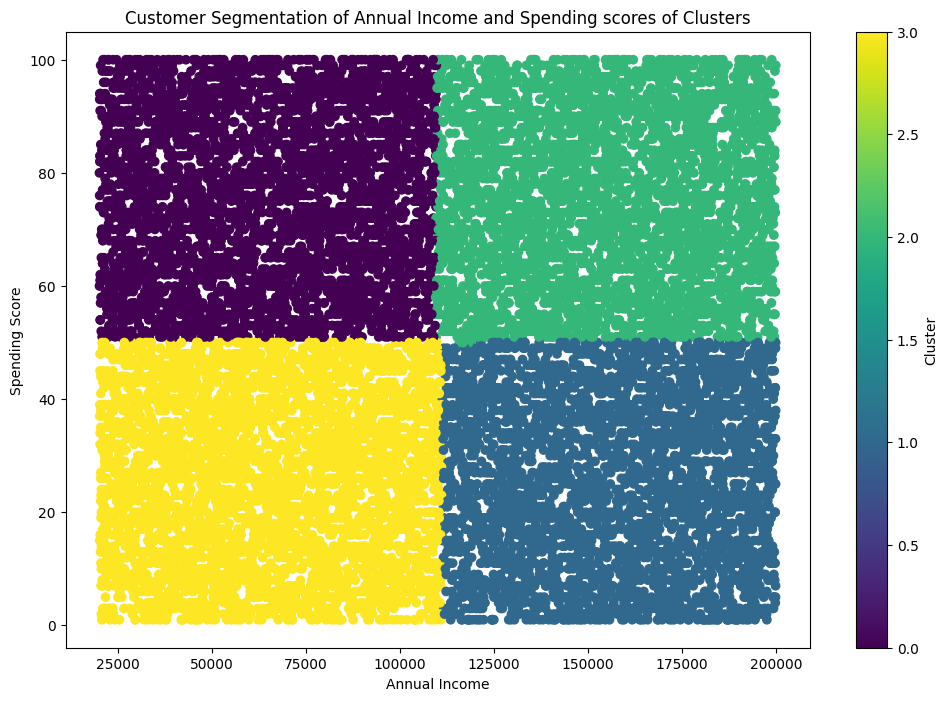

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/nelson/Downloads/K-Cluster mall file - Shopping Mall Customer Segmentation Data .csv')

features = data[['Annual Income', 'Spending Score']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=0)  
data['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(12, 8))
plt.scatter(data['Annual Income'], data['Spending Score'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation of Annual Income and Spending scores of Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')
plt.show()

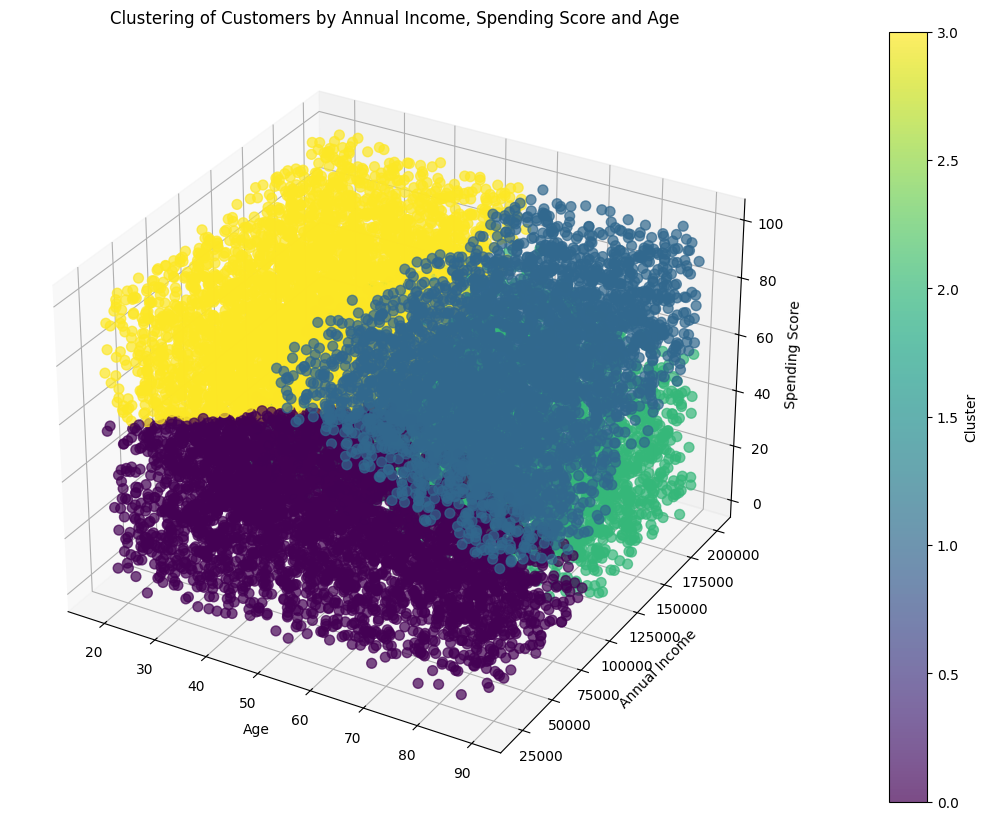

In [10]:
features = data[['Age', 'Annual Income', 'Spending Score']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=0)  # Adjust n_clusters as needed
data['Cluster'] = kmeans.fit_predict(features_scaled)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Age'], data['Annual Income'], data['Spending Score'], 
c=data['Cluster'], cmap='viridis', alpha=0.7, s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('Clustering of Customers by Annual Income, Spending Score and Age')

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

plt.show()


# Introduction
The aim of this project is to perform a customer segemntation analysis for an e-commerce company.By analysing customer behaviour and purchasing pattern,the goal of this analysis to group customers in distinct group to study various group's purchasing behaviour.The data is grouped into 4 clusters starting from 0 and ending at 3.


## Insights
-The first cluster group of (0), have a mean annual income of $64,641, mean spending score of 75.50 and a customer count of 3,761. This group have a low annual income but a high spending score which depicts a group with low income who spend more of thier income.
-The second cluster (1), have a customer count of 3,623, a mean annual income of $156,566 and a mean spending score of 25.45. This cluster has a high average incomes and lower spending score which represents whealthy groups who spend less.
-The next cluster (2) with a customer count of 3,816, a mean annual income of $154,867, and a mean standard score of75.07. This group also like cluster 1 has a high annual income but a rather high spending score.
-The final cluster (3), has the highest customer count of 3,879, a mean annula income of $65,348 and a mean spending score of 25.77. This final group represent customers with a low annual income as well as a low spending score.


## Visualizations and Interpretation
 -ELBOW GRAPH FOR CLUSTERING
 The graph which is used to provide insight on the optimal number of clusters in KMeans clustering. With the WCSS decreasing as more clusters are included, the elbow of the graph is located between 3 and 4 indicating that 4 distinct goups will be ideal for analyzing the dataset.


 -ANNUAL INCOME vs SPENDING SCORE BY GENDER
 The scattered plot visualization which is the first in the analysis is used to check if the annual income and spending score have any correlation with the 2 gender present (female and male). A correlation score of 0.01 for Male and 0.00 for Female depicts no correlation between both gender's respective annual income and spendig scores.The average income is $109742.88 and an average spending score 50.59 .


 -BOX PLOT OF SPENDING SCORE BY GENDER
 The median score of both genders which is around 50 indicates that half of both gender spend above above the value whiles the other half of the customers spend above the value.
 The interquartile range depicts that the middle 50% of customers irrespective of thier gender, have spending scores largely within that range.
 There data has no outliers with both genders having customers in both extremely low and extremly high spding range.
 The symmetrical distribution of the data depicts that neither of the gender is skewed in thier spending habits, futhermore proving that both gnders have an even spending behaviour.
  

 -HISTOGRAM OF ANNUAL INCOME
 This histogram represents the distribution of annual income across the dataset with the x -axis Annual income and the y-axis, representing the number of customers.
 The histogram demonstrates how the annual income range of $25,000 to $200,000 is fairly evenly distributed. The absence of notable highs or lows indicates that the dataset fairly represents consumers in different income ranges.The mid-to-high income group has a somewhat higher frequency, particularly in the $150,000 range. Even while the distribution is reasonably even across all income groups, this can point to a concentration of higher-income clients.
 The absence of extreme skewness indicates that neither the high-income nor low-income segments of the client base make up a significant portion of the base. This harmony makes it possible to implement wide-ranging marketing tactics that don't too concentrate on any one demographic and may target a range of economic levels.The fact that the frequency does not significantly vary according to income level suggests that the company serves a wide spectrum of clients and that a variety of income levels find its goods and services appealing.


 -HISTOGRAM OF AGE DISTRIBUTION
 The visualization shows a the various age range of the dataset and thier respect frequencies, with age distribution being relatively even.The age range is between 20 to 90.
 Peaks in customer frequencies can be observed in ages,30-40, 50-60 and 70- 80, whereas the ranges of 20-30, 40-50 and 60-70 indicate various dips in customer frequencies, especially range 20-25.
 The Kennel Density Estimation curve shows a smooth trend in customer age distribution.Nonetheless, the curve shows a slight curve in customer frequencies as the age increases then stabilizes as it gets to the mid age range of and decreases towards the end of the age range which is 90.


  -CUSTOMER SEGEMENTATION OF ANNUAL INCOME AND SPENDING SOCRES OF CLUSTERS
 The 2D scatter plot visualizes the customer segemtation of the various clusters which are are coloured differently. The clusters which are; 0,1,2,3 and their respective colurs; purple,light blue,green and yellow represent distinct groups. The x-axis represents Annual Income and the y-axis represents Spending Scores.
 The first cluster which is (0), includes people with low income generally around (25,000 - 75,000) but have high spending scores which are above 60. The are probably customers who spend more regardless of thier of budget.
 The second cluster (1) includes people who are low income earners (25,000 - 75, 000) with low spendig scores. This group a low spenders whcih is understandable due to thier income.They maybe customers who budget excessively due to thier income or customers who prefer other competitors who offer them lesser prices.
 The next cluster (2) are customers who are high spenders who have high annual value, with high spending scores (60). These are customers who have the means to purchase more products and could possibly be loyal high-value customers.
 The final cluster (3) include customers who are high income earners, above (125,000) but have low spending scores. These are customers who ahve the financial means but do not purchase alot of products. They may be customers who are interested in other brands or probaly saving for other investments.


 -CLUSTERING OF CUSTOMERS BY ANNUAL INCOME, SPENDING SCORES AND AGE
 The visualisations makes use of the cluster which ranges fro 0 -3 and are colour coded. The segementaion is based on 3 variables; Age, Annual Income and Spending Score.
 Cluster (0) purple, are low income earners with a low spending score below (40). The particularly around age 20 upwards.These customers are less likely to spend due to thier low spending score an also the fact they are generally low earners. 
 The next cluster (1) yellow, are customers who have low income(25,000 - 75,000) but have spending scores above 60. These are young customers mostly between the ages of 20- 40. Despite thier low income, they are willing to spend more, which is probably as a result of trends.
 The third cluster (2) green, are customers who are high income earners and have high spending score(above 60). These are middle age customers to the older generation (30yrs - 60yrs). This group will be a key element for premuim offerings and loyalty programs.
 The last cluster (3) blue are high income earners with low spending scores. The mostly range between the ages of 30 to 60. Despite thier income, they seem to be less interested in the bussiness's products.


## Recommendations
 -TARGETED PROMOTION
 Since Cluster 2 customers are well-off and willing to spend a lot, concentrate your efforts there on premium goods and services. Provide discounts or value packages for Clusters 0 and 3 to promote spending.

 -PERSONALIZED MARKETING
  You should think about developing tailored marketing plans for Cluster 1 in order to entice them to spend more money. You might do this by emphasizing special deals or loyalty initiatives.

  -PRODUCT DIVERSIFICATION
  Make sure the portfolio of products consists of both high-end products for affluent consumers (Cluster 2) and more affordable choices for clusters 0 and 3, which are more cost-conscious.

  GENDER-BASED RECOMMENDATION
  The box plot illustrates how spending habits by gender seem to be fairly balanced across income levels. More successful marketing initiatives might arise from focusing on the shared tastes of both genders and not overly distinguishing products based on gender.

  ANNUALINCOME RECOMMENDATION.
  The distribution of yearly income among customers is pretty uniform, as indicated by the histogram, which also suggests a small decrease near the lower and upper ends and a slight increase in the number of customers earning approximately $150,000.The business might adjust its marketing tactics to target consumers with greater incomes (between $150,000 and $200,000), as they are probably going to spend more on high-end goods and services. Offer discounts or incentives to clients who fall into lower income categories in an effort to get them to spend more money.
 
 AGE DISTRIBUTION RECOMMENDATION.
  We suggest that you concentrate your marketing efforts on customers in the 30-to 50-year-old demographic, as they make up a sizable chunk of your customer base. Additionally, since they make up a sizable section of the population, consider marketing services or products that specifically target older customers (70+).

 ANNUAL INCOME AND SPENDING SCORES RECOMMENDATIONS
  For the Purple Cluster 0: since customers of this cluster are willing to spend money even in the face of a lower income, offering upsell and cross-sell alternatives that are reasonably priced (such as loyalty rewards, payment plans, or discounts) may boost customer engagement.Also give special attention to promotions that fit their budgetary constraints while preserving their enthusiasim for shopping.

  For Yellow Cluster 1: More incentives are needed to get these customers to interact. Think about implementing focused marketing efforts that highlight the offerings' value and highlight inexpensive or budget-friendly solutions.
  by reducing perceived barriers, special discounts or membership offers which may encourage them to spend more money. 

 Concerning Group 2 (Green):Loyalty Programs: In order to keep valuable customers, you should provide them with individualized services, exclusive offers, and loyalty programs. Maintain their interest with first-rate experiences.To make sure customers keep finding value in what you have to offer, introduce high-end services or goods that suit their budget.

 For the Blue Cluster 3: Look at the reasons behind the high income levels of these clients' low expenditure. Focus groups and surveys may be able to shed light on their wants and what might encourage them to spend more money. Their purchasing may increase if you introduce unique high-end items or run personalized re-engagement marketing that cater to their interests.Further investigation, including demographics, expenditure patterns, or lifestyle inclinations, may enhance understanding of each cluster's behavior and optimize segmentation tactics.

 ANNUAL INCOME,SPENDING SCORE AND AGE RECOMMENDATIONS
 For the Purple Cluster 0:Craft offers specifically for elderly citizens, such as lifestyle-oriented services, health-related goods, or senior discounts. To re-engage older clients, use tailored communication that highlights how your products can fulfill their unique demands.Make sure the user interface is easy to use and straightforward, particularly for elderly clients who could place a higher value on simplicity.

 For Yellow Cluster 1:Put an emphasis on goods and services, such experiences, tech-related goods, or trendy items, that appeal to younger consumers.Put in place loyalty programs that give discounts for regular purchases. These should focus especially on younger clients who are eager to spend even when their income is lower. Augmentation may also prove to be a successful tactic. Using trends and digital engagement techniques, reach out to these younger consumers through influencer marketing and social media platforms.

 Regarding Group 2 (Green): Keep your attention on high-end, exclusive products and services that accommodate their increased purchasing capacity. VIP services, special access, and customized experiences could increase their involvement.Also, since this cluster consists of middle-aged high-spenders, tactics including customized discounts, loyalty levels, and invitation-only events will help maintain the customers' brand loyalty.Use their eagerness to spend money to your advantage by upselling or cross-selling related high-end goods and services.

 With regards to the last cluster (3): Look at the reasons behind these affluent clients' decreased spending. Feedback systems or customer surveys may reveal obstacles keeping customers from participating more.Make retargeting advertisements that are specifically customized for them, emphasizing exclusive offers or high-end services. Look into special offers or tailored suggestions to get them back in the loop.Fuhtermore, pay attention to marketing that focuses on lifestyle or life stages, such as luxury, family- or retirement-oriented products, as they may speak to their wants and desires.


## Conclusion
The data provides insightful information about the behavior of clients according to their gender, age, and income. You can boost customer happiness and profitability by customizing your product offers and marketing strategies based on customer segmentation and unique behavior analysis. The following actions ought to entail putting these suggestions to the test with focused advertising campaigns and assessing the results to further hone the strategy.
This study offers a road map for understanding consumer behavior and making data-driven decisions that will propel further expansion.
